Purpose of this notebook: 
* compute the offsets from the different summary stat methods

The files that are saved: 
* 'primary_peak_df.h5'
* 'spheric_proj_uber_df.h5'

In [96]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [97]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (10, 8)

In [157]:
from __future__ import print_function
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import compute_distance as compDist
import plot_cred_int as plotCI
import get_KDE

In [99]:
data_path = "../../data/test_results/"

# read in files 

want to read in the second half of the projections for the DM data

In [201]:
clstNo = 43
date_stamps = ['06_17_16', '06_21_16']

main_FOF_h5 = h5py.File(
        "../../data/" +
        "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135" +
        ".hdf5", "r")

# this has all the info 
star_no_dens_fhats = \
    h5py.File(data_path + 
              "stars_fhat_clst_no_density_43_06_25_16.h5", 'r')

# figure out how many projections we did 

In [156]:
summary_stat_keys = ['BCG', 'centroid', "shrink_cent"]

The following takes quite a long time because it has to compute the following dataframe entries:

## projection dependent df 
This matches the luminosity KDE peaks and the DM peaks 

| ClstNo | kernel_width | $\Delta s_{BCG}$ | $\Delta s_{KDE}$ | $\zeta$ | $\Delta s_{SA}$ | $\Delta s_{C}$ | total_peaks_dens | no_gal_peaks | DM_x_peak | DM_y_peak | 

In [192]:
uber_df_list = []
for date_stamp in date_stamps:
    
    DM_fhats = \
        h5py.File(data_path +
              "DM_fhat_clst{0}_{1}.h5".format(
                clstNo, date_stamp), 'r')
    star_fhats = \
        h5py.File(data_path +
              "stars_fhat_clst{0}_{1}.h5".format(
                clstNo, date_stamp), 'r')
    
    uber_df_list.append(
        compDist.convert_result_fhat_to_proj_uber_df(
        star_fhats, DM_fhats))
    
    star_fhats.close()
    DM_fhats.close()

In [193]:
uber_proj_df = pd.concat(uber_df_list)

In [194]:
uber_proj_df.shape

(81730, 19)

In [195]:
uber_proj_df.to_hdf('../../data/spheric_proj_uber_df.h5', 'df')

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/pandas/io/pytables.py:2558: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block2_values] [items->['projection']]

  warnings.warn(ws, PerformanceWarning)


In [196]:
gpby = uber_proj_df.groupby(['peak_id', 'bin_width'])

In [203]:
primary_peak_df = gpby.get_group((0, 25.))

In [199]:
primary_peak_df.to_hdf('../../data/primary_peak_df.h5', 'df')

In [226]:
primary_peak_df['clstNo'] = primary_peak_df.index

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
primary_peak_df.clstNo 

# find clusters where the most bound particle doesn't match the DM peak well

In [205]:
primary_peak_df.keys()

Index([u'BCG', u'Delta_x_BCG', u'Delta_x_centroid', u'Delta_x_shrink_cent', u'Delta_y_BCG', u'Delta_y_centroid', u'Delta_y_shrink_cent', u'centroid', u'shrink_cent', u'peak_id', u'KDE', u'Delta_x_KDE', u'Delta_y_KDE', u'matched_DM_peak_x', u'matched_DM_peak_y', u'total_peaks_dens', u'bin_width', u'gal_peak_no', u'projection'], dtype='object')

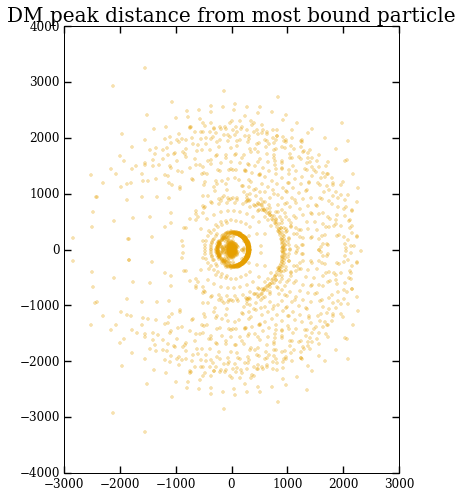

In [208]:
plt.axes().set_aspect('equal')
plt.plot(primary_peak_df['matched_DM_peak_x'], 
         primary_peak_df['matched_DM_peak_y'], '.', alpha=0.3)
plt.title('DM peak distance from most bound particle')

In [ ]:
plt.axes().set_aspect('equal')
plt.plot(primary_peak_df['matched_DM_peak_x'], 
         primary_peak_df['matched_DM_peak_y'], '.', alpha=0.3)
plt.title('')